1. Scipy - обрезка изображения
Задача
Возьмите свою собственную фотографию c лицом в grayscale. Либо воспользуйтесь стандартным фото из scipy misc.face(gray=True). 
Выведите изображения, как на скриншоте ниже:

Цветовая карта;
Обрезанное изображение;
Изображение, где лицо выделено при помощи кружка.

D:\Temp\ipykernel_16968\1720120283.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)
D:\Temp\ipykernel_16968\1720120283.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


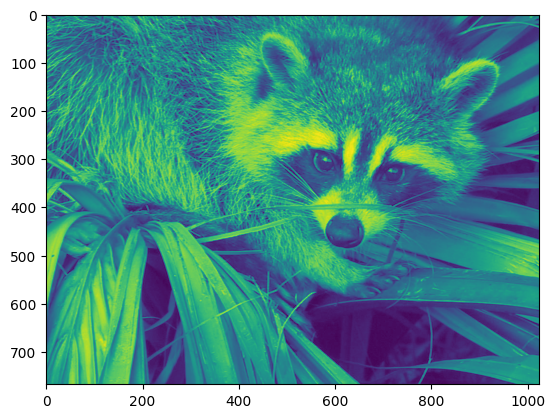

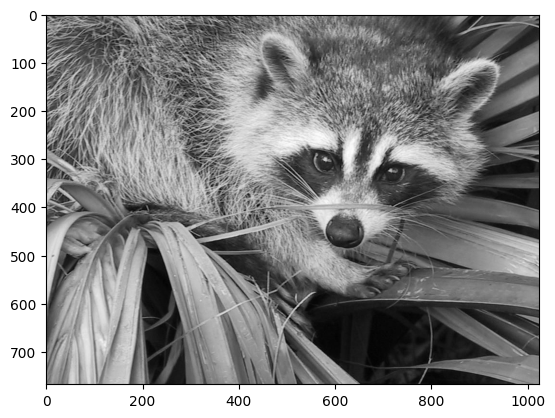

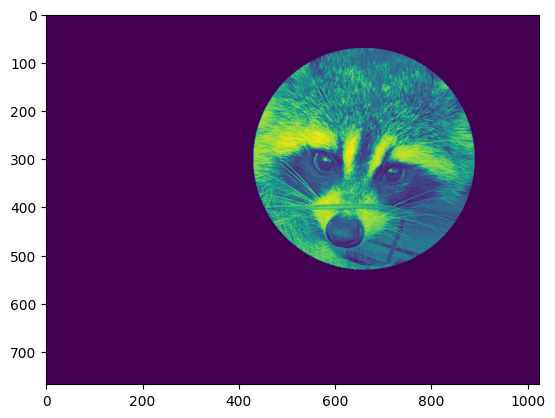

In [9]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
face = misc.face(gray=True)

face = misc.face(gray=True)
plt.imshow(face) 
plt.show()

plt.imshow(face, cmap=plt.cm.gray)   
plt.show()
crop_face = face[100:-100, 100:-100]

sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape

centerx, centery = (660, 300) # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # круг

face[mask] = 0
plt.imshow(face)   
plt.show()



Работа со статистикой
Задача
Возьмите данные из файла populations.txt и опишите данные о популяции зайцев (hares), рысей (lynxes) и моркови (carrots) в северной Канаде за 20 лет. 
Попробуйте повторить этот график:

Попробуйте найти без использования for-loop:
mean (среднее) и std (стандартная девиация) значение численности популяций каждого вида за годы периода.
В каком году популяция каждого вида была наибольшей?
Какой вид имеет наибольшую популяцию за каждый год? (argsort и np.array(['H', 'L', 'C']))
В какие годы любая из популяций превышает 50000? (Подсказка: сравнение и np.any)
Топ 2 года для каждого вида, когда его популяции были самыми низкими. (argsort).
Сравните (постройте график) изменения численности зайцев (см. help(np.gradient)) и численности рысей. Проверьте корреляцию (см. help(np.corrcoef)).

Средняя численность зайцев: 34080.95 (std: 20897.91)
Средняя численность рысей: 20166.67 (std: 16254.59)
Средняя численность моркови: 42400.00 (std: 3322.51)
Наибольшая популяция зайцев в году 1903.0: 77400
Наибольшая популяция рысей в году 1904.0: 59400
Наибольшая популяция моркови в году 1900.0: 48300
Вид с наибольшей популяцией для каждого года:
Год 1900.0: C
Год 1901.0: C
Год 1902.0: H
Год 1903.0: H
Год 1904.0: L
Год 1905.0: L
Год 1906.0: C
Год 1907.0: C
Год 1908.0: C
Год 1909.0: C
Год 1910.0: C
Год 1911.0: C
Год 1912.0: H
Год 1913.0: H
Год 1914.0: H
Год 1915.0: L
Год 1916.0: C
Год 1917.0: C
Год 1918.0: C
Год 1919.0: C
Год 1920.0: C
Годы, в которых любая популяция превышает 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Топ 2 года с наименьшей популяцией для каждого вида:
For Hares: Years [1917. 1916.] 
For Lynxes: Years [1900. 1901.] 
For Carrots: Years [1916. 1903.] 
Корреляция между изменениями численности зайцев и рысей:
-0.05136252586288724


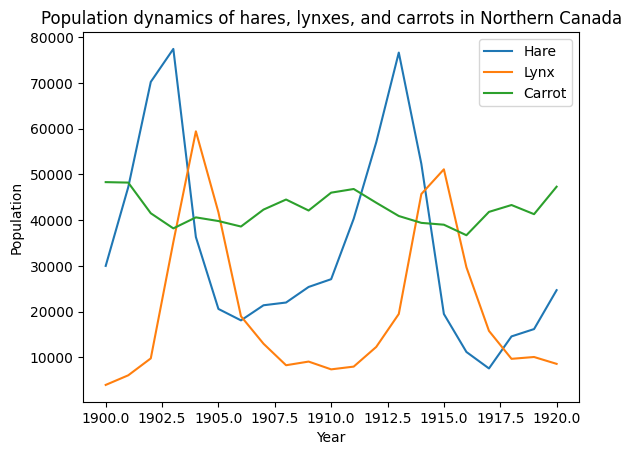

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('scipy-lectures.org__downloads_populations.txt')
year, hares, lynxes, carrots = data.T

# Среднее значение и стандартная девиация для каждого вида
hares_mean = np.mean(hares)
lynxes_mean = np.mean(lynxes)
carrots_mean = np.mean(carrots)

hares_std = np.std(hares)
lynxes_std = np.std(lynxes)
carrots_std = np.std(carrots)

print("Средняя численность зайцев: {:.2f} (std: {:.2f})".format(hares_mean, hares_std))
print("Средняя численность рысей: {:.2f} (std: {:.2f})".format(lynxes_mean, lynxes_std))
print("Средняя численность моркови: {:.2f} (std: {:.2f})".format(carrots_mean, carrots_std))

# Наибольшая популяция для каждого вида и соответствующий год
hares_max = np.max(hares)
lynxes_max = np.max(lynxes)
carrots_max = np.max(carrots)

hares_max_year = year[np.argmax(hares)]
lynxes_max_year = year[np.argmax(lynxes)]
carrots_max_year = year[np.argmax(carrots)]

print("Наибольшая популяция зайцев в году {}: {:.0f}".format(hares_max_year, hares_max))
print("Наибольшая популяция рысей в году {}: {:.0f}".format(lynxes_max_year, lynxes_max))
print("Наибольшая популяция моркови в году {}: {:.0f}".format(carrots_max_year, carrots_max))

# Вид с наибольшей популяцией для каждого года
max_population_species = np.array(['H', 'L', 'C'])
max_population = np.argmax(data[:, 1:], axis=1)
max_population_species_for_years = max_population_species[max_population]

print("Вид с наибольшей популяцией для каждого года:")
for i in range(len(year)):
    print("Год {}: {}".format(year[i], max_population_species_for_years[i]))

# Годы, в которые любая из популяций превышает 50000
years_exceeding_50000 = year[np.any(data[:, 1:] > 50000, axis=1)]
print("Годы, в которых любая популяция превышает 50000:", years_exceeding_50000)

# Топ 2 года с наименьшей популяцией для каждого вида
# Топ 2 года с наименьшей популяцией для каждого вида
lowest_population_years = np.argsort(data[:, 1:], axis=0)[:2]
print("Топ 2 года с наименьшей популяцией для каждого вида:")
for i, species in enumerate(['Hares', 'Lynxes', 'Carrots']):
    print(f"For {species}: Years {year[lowest_population_years[:, i]]} ")


# Изменения численности зайцев и рысей, и корреляция
hares_gradient = np.gradient(hares)
lynxes_gradient = np.gradient(lynxes)

print("Корреляция между изменениями численности зайцев и рысей:")
correlation = np.corrcoef(hares_gradient, lynxes_gradient)[0, 1]
print(correlation)

# Построение графика численности популяций
plt.plot(year, hares, label='Hare')
plt.plot(year, lynxes, label='Lynx')
plt.plot(year, carrots, label='Carrot')

plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population dynamics of hares, lynxes, and carrots in Northern Canada')

plt.show()

Напишите скрипт, который нарисует множество Мандельброта на ваш вкус (в плане количества итераций). Например:
N_max = 50
some_threshold = 50

c = x + 1j*y

z = 0
for j in range(N_max):
    z = z**2 + c

Постройте сетку из значений c = x + 1j*y в диапазоне [-2, 1] x [-1.5, 1.5].
Выполните итерацию.
Сформируйте 2-мерную boolean маску, указывающую, какие точки входят в набор.
Сохраните результат в виде изображения.

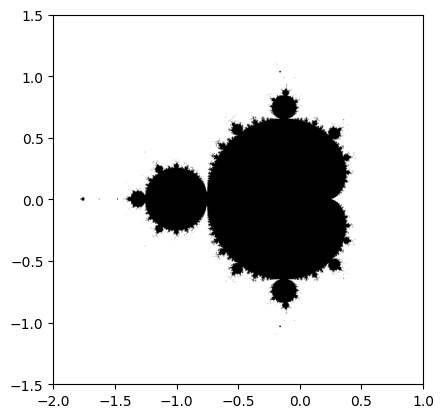

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Количество итераций
N_max = 50

# Установка размеров сетки
X = np.linspace(-2, 1, 1000)
Y = np.linspace(-1.5, 1.5, 1000)
Z = np.zeros((len(Y), len(X)), dtype=bool)

# Перебор точек сетки и применение итеративной функции
for i, x in enumerate(X):
    for k, y in enumerate(Y):
        c = x + 1j * y
        z = 0
        for j in range(N_max):
            z = z**2 + c
            # Если величина z превысила 2, то это точка не входит во множество Мандельброта
            if np.abs(z) > 2:
                Z[k, i] = 1
                break

# Нарисовать и сохранить изображение
plt.imshow(Z, extent=[-2, 1, -1.5, 1.5], origin='lower')
plt.gray()
plt.savefig('mandelbrot.png')
plt.show()



4. Цепь Маркова - бонусное задание
Матрица переходов цепи Маркова P и распределение вероятностей по состояниям p:
0 <= P[i,j] <= 1: вероятность перехода из состояния i в состояние j
Правило перехода:  (p_{new} = P^T p_{old})
all(sum(P, axis=1) == 1), p.sum() == 1: нормализация

Напишите скрипт, который работает с 5 состояниями, а также:
Строит случайную матрицу и нормализует каждую строку так, чтобы это была матрица переходов.
Стартует со случайного (нормированного) распределения вероятностей p и делает 50 steps => p_50
Вычисляет стационарное распределение: собственный вектор P.T с собственным значением 1 (численно: ближе всего к 1) => p_stationary
Не забудьте нормировать собственный вектор!
Проверьте, равны ли p_50 и p_stationary с допуском 1e-5.
Рекомендуемые инструменты: np.random.rand, .dot(), np.linalg.eig, reductions, abs(), argmin, comparisons, all, np.linalg.norm.

In [27]:
import numpy as np

def normalize_rows(matrix):
    return matrix / matrix.sum(axis=1, keepdims=True)

def main():
    # Генерация случайной матрицы переходов
    P = normalize_rows(np.random.rand(5, 5))

    # Начальное случайное распределение вероятностей
    p = normalize_rows(np.random.rand(5, 1))

    # Итерации для 50 шагов
    for _ in range(50):
        p = np.dot(P.T, p)

    # Вычисление стационарного распределения
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary_index = np.argmin(np.abs(eigenvalues - 1.0))
    p_stationary = np.abs(eigenvectors[:, stationary_index])
    p_stationary = normalize_rows(p_stationary.reshape(-1, 1))

    # Проверка на равенство p_50 и p_stationary с допуском 1e-5
    tolerance = 1e-5
    are_equal = np.all(np.abs(p - p_stationary) < tolerance)

    print("Матрица переходов P:")
    print(P)
    print("\nНачальное распределение вероятностей p:")
    print(p)
    print("\nРаспределение вероятностей после 50 шагов p_50:")
    print(p)
    print("\nСтационарное распределение p_stationary:")
    print(p_stationary)

    if are_equal:
        print("\np_50 и p_stationary равны с допуском 1e-5.")
    else:
        print("\np_50 и p_stationary не равны с допуском 1e-5.")

if __name__ == "__main__":
    main()

Матрица переходов P:
[[0.30053815 0.41812775 0.03318707 0.14301021 0.10513683]
 [0.27441063 0.10866835 0.19589719 0.15183755 0.26918628]
 [0.31428266 0.15474224 0.06843763 0.22382872 0.23870876]
 [0.18843627 0.29388823 0.05937792 0.24720403 0.21109355]
 [0.20049531 0.31571058 0.07120144 0.17023877 0.24235389]]

Начальное распределение вероятностей p:
[[1.27045489]
 [1.33786812]
 [0.46279654]
 [0.8848898 ]
 [1.04399065]]

Распределение вероятностей после 50 шагов p_50:
[[1.27045489]
 [1.33786812]
 [0.46279654]
 [0.8848898 ]
 [1.04399065]]

Стационарное распределение p_stationary:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

p_50 и p_stationary не равны с допуском 1e-5.


5. Орбиты - бонусное задание
Рассмотрим физику небесных тел, а именно, орбиты. Для этого нам необходимо решить второй закон Ньютона вместе с законом всемирного тяготения Ньютона. Если ограничиться плоскостью x-y, то необходимо решить 4 задачи: $x$, $y$, $v_x$ и $v_y$. Эти величины изменяются в соответствии с:
\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

Чтобы проинтегрировать их во времени, необходимо задать начальное условие для каждой величины. Настроим нашу систему так, чтобы Солнце находилось в начале координат (это будет один фокус), а планета начиналась в перигелии и двигалась по орбите против часовой стрелки.

Расстояние перигелия от фокуса составляет:
$$r_p = a (1 - e)$$

где $a$ - полу-мажорная ось, а $e$ - эксцентриситет. Перигелийная скорость направлена в сторону $y$ и составляет:
$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

Мы будем работать в астрономических единицах AU, годах и солнечных массах, в этом случае $GM_\star = 4\pi^2$ (для Солнца).

Ваши изначальные параметры должны быть:
  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$


Начальные условия должны быть такими:
def rhs(t, Y, GM=4*np.pi**2):
    """RHS для орбит, Y вектор решения, содержащий
    x, y, v_x, иv_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM*x/r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM*y/r**3

    return f

Воспользуйтесь методам интегрирования SciPy ODE для интегрирования орбиты и построения графика.

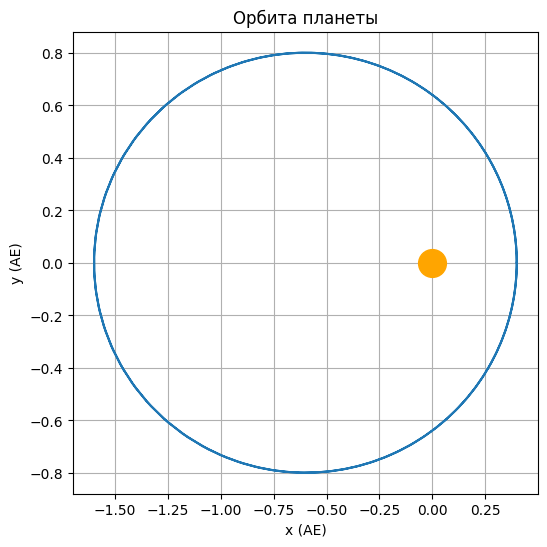

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def rhs(t, Y, GM=4*np.pi**2):
    x, y, vx, vy = Y
    f = np.zeros_like(Y)
    
    r = np.sqrt(x**2 + y**2)
    f[0] = vx  
    f[1] = vy  
    f[2] = -GM*x/r**3  
    f[3] = -GM*y/r**3  

    return f

a = 1.0  # полу-мажорная ось
e = 0.6  # эксцентриситет

r_p = a * (1 - e)  # радиус в перигелии
v_p = np.sqrt((4 * np.pi ** 2 / a) * (1 + e) / (1 - e))  # скорость в перигелии

Y0 = [r_p, 0, 0, v_p]  # начальные условия
t_span = [0, 2]  # два года интегрирования

sol = solve_ivp(rhs, t_span, Y0, args=(4*np.pi**2,), rtol=1e-8, atol=1e-8)

plt.figure(figsize=(6,6))

# Солнце в начале координат
plt.plot(0, 0, 'o', color='orange', markersize=20)

# Построим орбиту
plt.plot(sol.y[0], sol.y[1])

plt.xlabel('x (АЕ)')
plt.ylabel('y (АЕ)')
plt.title('Орбита планеты')
plt.grid(True)
plt.show()